In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd # csv I/O

IMG_SIZE = 299
MODEL_NAME = 'xception'

DATA_DIR= r'D:\LICENTA\processed_data\size_{size1}x{size2}'.format(size1=IMG_SIZE, size2=IMG_SIZE)
FEATURES_PATH = DATA_DIR +  r'\train_biz_{name}_features.csv'.format(name=MODEL_NAME)

In [3]:
train_photos = pd.read_csv('train_photo_to_biz_ids.csv')
train_photo_to_biz = pd.read_csv('train_photo_to_biz_ids.csv', index_col='photo_id')

train_df = pd.read_csv(FEATURES_PATH)

X = train_df['feature_vector'].values
Y = train_df['label'].values

def convert_label_to_array(str_label):
    str_label = str_label[1:-1]
    str_label = str_label.split(',')
    return [int(x) for x in str_label if len(x) > 0]

def convert_feature_to_vector(str_feature):
    str_feature = str_feature[1:-1]
    str_feature = str_feature.split(',')
    return [float(x) for x in str_feature]

Y = np.array([convert_label_to_array(y) for y in train_df['label']])
X = np.array([convert_feature_to_vector(x) for x in train_df['feature_vector']])

In [4]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(Y)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [5]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
result = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1996 samples in 1.188s...
[t-SNE] Computed neighbors for 1996 samples in 17.572s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1996
[t-SNE] Computed conditional probabilities for sample 1996 / 1996
[t-SNE] Mean sigma: 2.625298
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.101547
[t-SNE] Error after 300 iterations: 1.808662
Wall time: 1min 1s


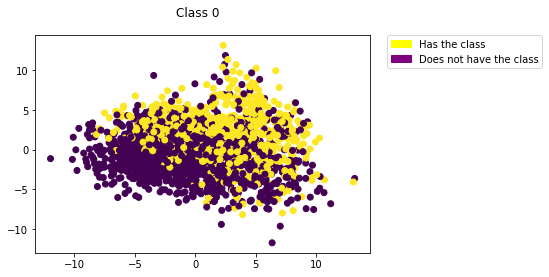

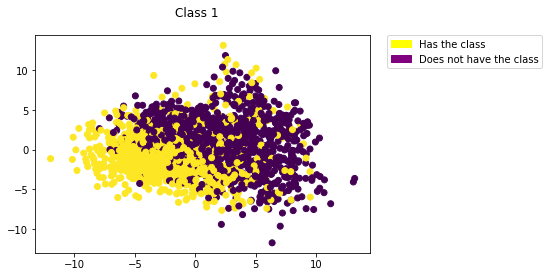

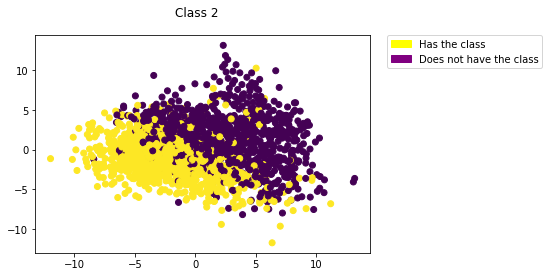

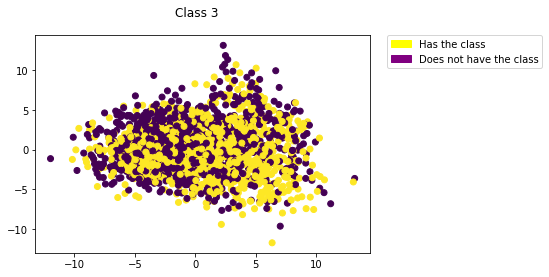

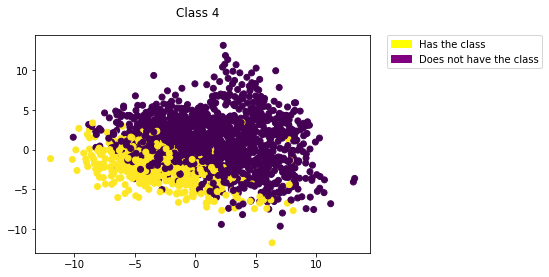

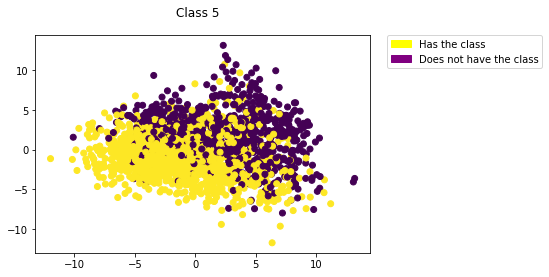

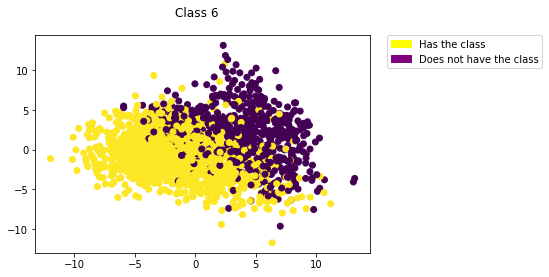

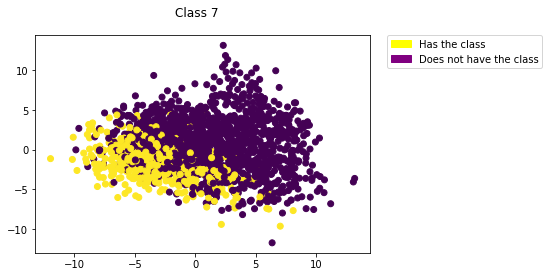

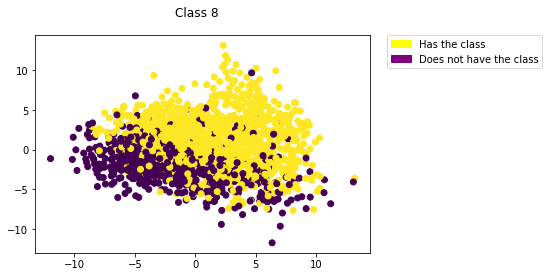

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

yellow_patch = mpatches.Patch(color='yellow', label='Has the class')
purple_patch = mpatches.Patch(color='purple', label='Does not have the class')

for class_index in range(9):
    colors = [int(i%2) for i in Y[:,class_index]]
    fig = plt.figure()
    fig.suptitle('Class ' + str(class_index))
    plt.legend(handles=[yellow_patch, purple_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.axis([-20, 20, -15, 15])
    plt.scatter(result[:,0], result[:,1], c=colors)
    plt.show()